<a href="https://colab.research.google.com/github/JyothiPeddireddy/Speech-Emotion-Recognition-using-ML/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

In [ ]:
def extract_audio_features(file_path):
    try:
        audio_data, sr = librosa.load(file_path, sr=None)
        zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(audio_data))
        energy = np.sum(audio_data**2) / len(audio_data)
        rms = np.mean(librosa.feature.rms(y=audio_data))
        skewness = scipy.stats.skew(audio_data)
        kurtosis = scipy.stats.kurtosis(audio_data)
        mean_amplitude = np.mean(audio_data)
        spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=audio_data, sr=sr))
        spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=audio_data, sr=sr))
        spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=audio_data, sr=sr))
        spectral_flatness = np.mean(librosa.feature.spectral_flatness(y=audio_data))
        spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=audio_data, sr=sr))
        spectral_flux = np.mean(np.diff(np.abs(librosa.stft(audio_data)), axis=1))
        mfcc = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=13)
        mfcc_mean = np.mean(mfcc, axis=1)
        delta_mfcc = librosa.feature.delta(mfcc)
        delta_mfcc_mean = np.mean(delta_mfcc, axis=1)
        delta2_mfcc = librosa.feature.delta(mfcc, order=2)
        delta2_mfcc_mean = np.mean(delta2_mfcc, axis=1)
        chroma_stft = np.mean(librosa.feature.chroma_stft(y=audio_data, sr=sr))

        return {
            'zero_crossing_rate': zero_crossing_rate,
            'energy': energy,
            'rms': rms,
            'skewness': skewness,
            'kurtosis': kurtosis,
            'mean_amplitude': mean_amplitude,
            'spectral_centroid': spectral_centroid,
            'spectral_bandwidth': spectral_bandwidth,
            'spectral_contrast': spectral_contrast,
            'spectral_flatness': spectral_flatness,
            'spectral_rolloff': spectral_rolloff,
            'spectral_flux': spectral_flux,
            'mfcc1': mfcc_mean[0], 'mfcc2': mfcc_mean[1], 'mfcc3': mfcc_mean[2], 'mfcc4': mfcc_mean[3],
            'mfcc5': mfcc_mean[4], 'mfcc6': mfcc_mean[5], 'mfcc7': mfcc_mean[6], 'mfcc8': mfcc_mean[7],
            'mfcc9': mfcc_mean[8], 'mfcc10': mfcc_mean[9], 'mfcc11': mfcc_mean[10], 'mfcc12': mfcc_mean[11],
            'mfcc13': mfcc_mean[12],
            'delta_mfcc1': delta_mfcc_mean[0], 'delta_mfcc2': delta_mfcc_mean[1], 'delta_mfcc3': delta_mfcc_mean[2],
            'delta_mfcc4': delta_mfcc_mean[3], 'delta_mfcc5': delta_mfcc_mean[4], 'delta_mfcc6': delta_mfcc_mean[5],
            'delta_mfcc7': delta_mfcc_mean[6], 'delta_mfcc8': delta_mfcc_mean[7], 'delta_mfcc9': delta_mfcc_mean[8],
            'delta_mfcc10': delta_mfcc_mean[9], 'delta_mfcc11': delta_mfcc_mean[10], 'delta_mfcc12': delta_mfcc_mean[11],
            'delta_mfcc13': delta_mfcc_mean[12],
            'delta2_mfcc1': delta2_mfcc_mean[0], 'delta2_mfcc2': delta2_mfcc_mean[1], 'delta2_mfcc3': delta2_mfcc_mean[2],
            'delta2_mfcc4': delta2_mfcc_mean[3], 'delta2_mfcc5': delta2_mfcc_mean[4], 'delta2_mfcc6': delta2_mfcc_mean[5],
            'delta2_mfcc7': delta2_mfcc_mean[6], 'delta2_mfcc8': delta2_mfcc_mean[7], 'delta2_mfcc9': delta2_mfcc_mean[8],
            'delta2_mfcc10': delta2_mfcc_mean[9], 'delta2_mfcc11': delta2_mfcc_mean[10], 'delta2_mfcc12': delta2_mfcc_mean[11],
            'delta2_mfcc13': delta2_mfcc_mean[12],
            'chroma_stft': chroma_stft
        }
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

In [ ]:
def extract_emotion_actor_from_filename(filename):
    try:
        clean_filename = filename.split(' ')[0]
        file_info = clean_filename.split('-')
        emotion = int(file_info[2])
        actor = int(file_info[6].split('.')[0])
        return emotion, actor
    except Exception as e:
        print(f"Error extracting emotion and actor from {filename}: {e}")
        return None, None

In [ ]:
base_dir = '/content/drive/MyDrive/RAVDESS'

In [ ]:
feature_list = []

for root, dirs, files in os.walk(base_dir):
    for filename in files:
        if filename.endswith(".wav"):
            audio_file_path = os.path.join(root, filename)
            features = extract_audio_features(audio_file_path)
            emotion, actor = extract_emotion_actor_from_filename(filename)
            if features is not None and emotion is not None and actor is not None:
                features['emotion'] = emotion
                features['actor'] = actor
                features['file_name'] = filename
                feature_list.append(features)

In [ ]:
print(feature_list)

[{'zero_crossing_rate': np.float64(0.06240375905797101), 'energy': np.float32(5.998084e-06), 'rms': np.float32(0.0015300212), 'skewness': np.float32(-0.84323543), 'kurtosis': np.float32(8.108008), 'mean_amplitude': np.float32(-8.3816985e-06), 'spectral_centroid': np.float64(5814.041015641487), 'spectral_bandwidth': np.float64(5877.727223865245), 'spectral_contrast': np.float64(15.300690405535072), 'spectral_flatness': np.float32(0.027620014), 'spectral_rolloff': np.float64(12138.58695652174), 'spectral_flux': np.float32(-6.6478705e-08), 'mfcc1': np.float32(-740.8795), 'mfcc2': np.float32(75.02702), 'mfcc3': np.float32(15.722651), 'mfcc4': np.float32(25.33917), 'mfcc5': np.float32(7.656649), 'mfcc6': np.float32(16.88337), 'mfcc7': np.float32(-1.7680539), 'mfcc8': np.float32(15.706873), 'mfcc9': np.float32(-3.8716726), 'mfcc10': np.float32(-0.05128678), 'mfcc11': np.float32(-1.3605976), 'mfcc12': np.float32(-1.504559), 'mfcc13': np.float32(1.0964247), 'delta_mfcc1': np.float32(-0.0181247

In [ ]:
df=pd.DataFrame(feature_list)

In [ ]:
print(df)

      zero_crossing_rate    energy       rms  skewness   kurtosis  \
0               0.062404  0.000006  0.001530 -0.843235   8.108008   
1               0.063263  0.000037  0.003450  0.006728  12.625639   
2               0.060709  0.000007  0.001538 -0.816059   9.521999   
3               0.051056  0.000021  0.002724 -0.208357   9.021136   
4               0.061558  0.000005  0.001379 -1.207917   9.615925   
...                  ...       ...       ...       ...        ...   
2924            0.080641  0.000215  0.008604  0.327475  10.249431   
2925            0.081094  0.000155  0.007447  0.084101   9.036255   
2926            0.070298  0.000139  0.006715  0.464739   9.662156   
2927            0.073821  0.000158  0.006596  0.270644  21.647314   
2928            0.083883  0.000380  0.011260  0.208092  10.950915   

      mean_amplitude  spectral_centroid  spectral_bandwidth  \
0      -8.381699e-06        5814.041016         5877.727224   
1       7.220722e-06        5651.952475      

In [ ]:
df=df.drop(['actor', 'file_name'], axis=1)

In [ ]:
correlation_matrix = df.corr()

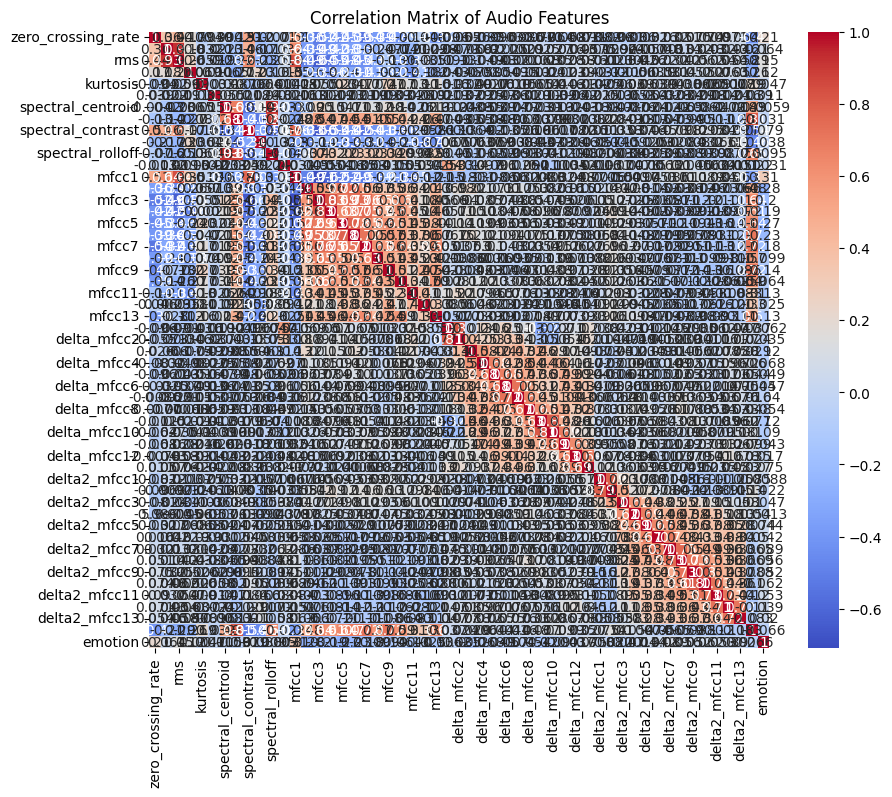

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Audio Features')
plt.show()

In [ ]:
threshold = 0.75
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))


In [ ]:
print("Highly correlated feature pairs (above threshold of 0.75):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: correlation = {pair[2]:.2f}")

Highly correlated feature pairs (above threshold of 0.75):
rms and energy: correlation = 0.93
spectral_rolloff and spectral_centroid: correlation = 0.93
spectral_rolloff and spectral_bandwidth: correlation = 0.88
mfcc1 and rms: correlation = 0.84
mfcc1 and spectral_contrast: correlation = 0.76
mfcc4 and mfcc3: correlation = 0.83
mfcc6 and mfcc5: correlation = 0.78
mfcc7 and mfcc3: correlation = 0.76
mfcc7 and mfcc4: correlation = 0.75
delta_mfcc2 and delta_mfcc1: correlation = 0.81
delta_mfcc10 and delta_mfcc9: correlation = 0.81
delta2_mfcc2 and delta2_mfcc1: correlation = 0.79
delta2_mfcc8 and delta2_mfcc7: correlation = 0.75
delta2_mfcc10 and delta2_mfcc9: correlation = 0.80
chroma_stft and spectral_bandwidth: correlation = 0.81


In [ ]:
def drop_highly_correlated_features(df, correlation_matrix, threshold=0.75):
    columns_to_drop = set()

    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                columns_to_drop.add(colname)
    return df.drop(columns=list(columns_to_drop))

In [ ]:
cleaned_features_df = drop_highly_correlated_features(df, correlation_matrix, threshold=0.75)
print("Remaining features after dropping correlated ones:")
print(cleaned_features_df.head())

Remaining features after dropping correlated ones:
   zero_crossing_rate    energy  skewness   kurtosis  mean_amplitude  \
0            0.062404  0.000006 -0.843235   8.108008       -0.000008   
1            0.063263  0.000037  0.006728  12.625639        0.000007   
2            0.060709  0.000007 -0.816059   9.521999       -0.000003   
3            0.051056  0.000021 -0.208357   9.021136       -0.000004   
4            0.061558  0.000005 -1.207917   9.615925       -0.000005   

   spectral_centroid  spectral_bandwidth  spectral_contrast  \
0        5814.041016         5877.727224          15.300690   
1        5651.952475         5623.661946          15.440413   
2        6008.116151         6065.053130          14.899751   
3        5474.792096         5734.751986          15.465401   
4        5714.950076         5885.635566          15.141542   

   spectral_flatness  spectral_flux  ...  delta2_mfcc3  delta2_mfcc4  \
0           0.027620  -6.647871e-08  ...      0.029820      0.003

In [ ]:
emotion_labels = {
    1: 'neutral',
    2: 'calm',
    3: 'happy',
    4: 'sad',
    5: 'angry',
    6: 'fearful',
    7: 'disgust',
    8: 'surprised'
}

In [ ]:
df['emotion'] = df['emotion'].replace(emotion_labels)

In [ ]:
output_csv="features_list_df.csv"
df.to_csv(output_csv,index=False)

In [ ]:
print(f'features saved to {output_csv}')

features saved to features_list_df.csv


In [ ]:
data=pd.read_csv('/content/features_list_df.csv')

In [ ]:
print(data)

      zero_crossing_rate    energy       rms  skewness   kurtosis  \
0               0.062404  0.000006  0.001530 -0.843235   8.108008   
1               0.063263  0.000037  0.003450  0.006728  12.625639   
2               0.060709  0.000007  0.001538 -0.816059   9.521999   
3               0.051056  0.000021  0.002724 -0.208357   9.021136   
4               0.061558  0.000005  0.001379 -1.207917   9.615925   
...                  ...       ...       ...       ...        ...   
2924            0.080641  0.000215  0.008604  0.327475  10.249431   
2925            0.081094  0.000155  0.007447  0.084101   9.036255   
2926            0.070298  0.000139  0.006715  0.464739   9.662156   
2927            0.073821  0.000158  0.006596  0.270644  21.647314   
2928            0.083883  0.000380  0.011260  0.208092  10.950915   

      mean_amplitude  spectral_centroid  spectral_bandwidth  \
0      -8.381699e-06        5814.041016         5877.727224   
1       7.220722e-06        5651.952475      

In [ ]:
X = data.drop('emotion', axis=1)

In [ ]:
y = data['emotion']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
rf_model = RandomForestClassifier(n_estimators=700, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=700, random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=skf)
print(f"Stratified Cross-validated accuracy: {scores.mean():.5f}")

Stratified Cross-validated accuracy: 0.83524


In [ ]:
y_pred = rf_model.predict(X_test_scaled)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=700, random_state=42)
rfe = RFE(rf_model, n_features_to_select=15)
rfe.fit(X_train_scaled, y_train)

X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

rf_model.fit(X_train_rfe, y_train)

y_pred = rf_model.predict(X_test_rfe)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy after RFE: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Accuracy after RFE: 0.96

Classification Report:
              precision    recall  f1-score   support

       angry       0.97      0.94      0.95        62
        calm       0.95      0.95      0.95        88
     disgust       0.98      0.98      0.98        82
     fearful       0.97      0.92      0.95        78
       happy       0.98      0.95      0.97        88
     neutral       1.00      1.00      1.00        43
         sad       0.87      0.94      0.91        71
   surprised       0.97      1.00      0.99        74

    accuracy                           0.96       586
   macro avg       0.96      0.96      0.96       586
weighted avg       0.96      0.96      0.96       586

